Details of Dataset :

All the code files report is updated in github : https://github.com/AkhilaAnnireddy/Crime-Data-Analysis/tree/main 

Dataset name in github : estimated_crimes_1979_2023.csv - load this file to run the notebook

national_data.csv , state_data.csv, state_data_cleaned.csv are generated through the code 

# 1. Install Required packages

In [188]:
# Install necessary packages
options(warn = -1)
install.packages("dplyr")
install.packages("ggplot2")
install.packages("car")
install.packages("boot")
install.packages("tidyr")
install.packages("tidyverse")
install.packages("e1071")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 2.Load libraries

In [189]:
library(dplyr)
library(ggplot2)
library(car)
library(boot)
library(tidyr)
library(tidyverse)
library(e1071)

# 3. Load the Dataset

In [190]:
crime_data <- read.csv("estimated_crimes_1979_2023.csv")

#displaying the first few rows
head(crime_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1979,,,220099000,1208030,21460,76390,,480700,629480,11041500,3327700,6601000,1112800,
2,1979,AK,Alaska,406000,1994,54,292,,445,1203,23193,5616,15076,2501,
3,1979,AL,Alabama,3769000,15578,496,1037,,4127,9918,144372,48517,83791,12064,
4,1979,AR,Arkansas,2180000,7984,198,595,,1626,5565,70949,21457,45267,4225,
5,1979,AZ,Arizona,2450000,14528,219,1120,,4305,8884,177977,48916,116976,12085,
6,1979,CA,California,22696000,184087,2952,12239,,75767,93129,1511021,496310,847148,167563,


# 4. Overview of Dataset Attributes

In [191]:
# Display all column names
colnames(crime_data)


[1] "year"                "state_abbr"          "state_name"         
 [4] "population"          "violent_crime"       "homicide"           
 [7] "rape_legacy"         "rape_revised"        "robbery"            
[10] "aggravated_assault"  "property_crime"      "burglary"           
[13] "larceny"             "motor_vehicle_theft" "caveats"

Understanding each attribute in the dataset

1. year: The calender year the date corresponds to (1973, 2023)
2. state_abbr: Abbrevation to U.S. state
3. state_name: Full name of U.S. state
4. population: Estimated population of the state or country for the respective year
5. violent_crime: Total no.of reported violent crimes (sum of homicide, rape, robbery, and aggravated assault)
6. Homicide: Number of reported homicides (intentional killing of another person)
7. rape_legacy: Number of reported rape cases using the legacy definition (prior to the FBI’s updated definition)
8. rape_revised: Number of reported rape cases using the revised definition (introduced in 2013).
9. robbery: Number of reported robberies (theft involving force or threat of force).
10. aggravated_assault: Number of reported aggravated assault cases (attacks intended to cause severe bodily harm)
11. property_crime: Total number of reported property crimes (sum of burglary, larceny, and motor vehicle theft)
12. burglary: Number of reported burglaries (unlawful entry into a structure to commit theft or felony)
13. larceny: Number of reported larcenies (theft of personal property without force).
14. motor_vehicle_theft: Number of reported motor vehicle thefts (stealing or attempting to steal vehicles)
15. caveats: Additional notes or disclaimers about the data. For instance, changes in definitions, underreporting, or data anomalies

# 5. Handling Data Type Discrepancies

- Converts year to integer: Ensures proper formatting for chronological analysis.
- Handles numeric columns: Removes commas (if any) and converts population and crime-related metrics to numeric.
- Converts state-related columns to character: Ensures these columns are treated as strings.

In [192]:
crime_data <- crime_data %>%
  mutate(year = as.integer(year))

In [193]:
# Convert population and crime-related columns to numeric

numeric_columns <- c(
  "population", "violent_crime", "homicide", "rape_legacy", 
  "rape_revised", "robbery", "aggravated_assault", 
  "property_crime", "burglary", "larceny", "motor_vehicle_theft"
)

crime_data <- crime_data %>%
  mutate(across(all_of(numeric_columns), ~ as.numeric(gsub(",", "", .))))

In [194]:
# Convert state abbreviation and state name to character

crime_data <- crime_data %>%
  mutate(
    state_abbr = as.character(state_abbr),
    state_name = as.character(state_name)
  )


In [195]:
str(crime_data)

'data.frame':	2336 obs. of  15 variables:
 $ year               : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ state_abbr         : chr  "" "AK" "AL" "AR" ...
 $ state_name         : chr  "" "Alaska" "Alabama" "Arkansas" ...
 $ population         : num  2.20e+08 4.06e+05 3.77e+06 2.18e+06 2.45e+06 ...
 $ violent_crime      : num  1208030 1994 15578 7984 14528 ...
 $ homicide           : num  21460 54 496 198 219 ...
 $ rape_legacy        : num  76390 292 1037 595 1120 ...
 $ rape_revised       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ robbery            : num  480700 445 4127 1626 4305 ...
 $ aggravated_assault : num  629480 1203 9918 5565 8884 ...
 $ property_crime     : num  11041500 23193 144372 70949 177977 ...
 $ burglary           : num  3327700 5616 48517 21457 48916 ...
 $ larceny            : num  6601000 15076 83791 45267 116976 ...
 $ motor_vehicle_theft: num  1112800 2501 12064 4225 12085 ...
 $ caveats            : chr  "" "" "" "" ...


# 6. Handling Missing Values

In [196]:
# Check for missing values

missing_summary <- colSums(is.na(crime_data))
missing_percentage <- colMeans(is.na(crime_data)) * 100

In [197]:
print("Missing Values Summary:")
print(missing_summary)

print("Percentage of Missing Values:")
print(missing_percentage)

[1] "Missing Values Summary:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft             caveats 
                  0                   0                   0 
[1] "Percentage of Missing Values:"
               year          state_abbr          state_name          population 
            0.00000             0.00000             0.00000             0.00000 
      violent_crime            homicide         rape_legacy        rape_revised 
            0.00000             0.00000            15.41096            75.68493 
  

### Analyze Attribute Caveats

In [198]:
# Get unique values in the 'caveats' column

unique_caveats <- unique(crime_data$caveats)

print("Unique values in 'caveats':")
print(unique_caveats)

[1] "Unique values in 'caveats':"
 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [2] "The state UCR Program was unable to provide 1985-2013 forcible rape figures in accordance with national UCR Program guidelines.  The rape totals were estimated using national rates per 100,000 inhabitants within the eight population groups and assigning the forcible rape volumes proportionally to the state."                                                                  

In [199]:
# Replace empty strings with NA in the 'caveats' column

crime_data$caveats[crime_data$caveats == ""] <- NA

missing_caveats_count <- sum(is.na(crime_data$caveats))
print(paste("Number of missing values in 'caveats' after replacing empty strings:", missing_caveats_count))

[1] "Number of missing values in 'caveats' after replacing empty strings: 2265"


In [200]:
# Checking the proportion of empty values

empty_caveats_percentage <- mean(is.na(crime_data$caveats)) * 100
print(paste("Percentage of missing/empty values in 'caveats':", round(empty_caveats_percentage, 2), "%"))

[1] "Percentage of missing/empty values in 'caveats': 96.96 %"


In [201]:
# Droping the column if it has minimal or irrelevant data

if (empty_caveats_percentage > 90) { 
  crime_data <- crime_data %>% select(-caveats)
  print("'caveats' column dropped due to irrelevance.")
} else {
  print("'caveats' column retained for reference.")
}

[1] "'caveats' column dropped due to irrelevance."


### Handling all empty strings in the Dataset

In [202]:
# Replace all empty strings in the dataset with NA

crime_data[crime_data == ""] <- NA

missing_summary <- colSums(is.na(crime_data))
print("Missing values after replacing empty strings:")
print(missing_summary)

[1] "Missing values after replacing empty strings:"
               year          state_abbr          state_name          population 
                  0                  41                  90                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 


# 7. Seperating the National and State related Crime Data

If the state name is empty then that column represents the national level data. So its good to seperate this data to perform timely analysis on national-level trends and state-wise analysis on state-specific data.

In [203]:
# Identifying nation-level records

national_data <- crime_data[(
  is.na(crime_data$state_name) | 
  crime_data$state_name == "" | 
  crime_data$state_name == "United States Total"
) & is.na(crime_data$state_abbr), ]

In [204]:
# Remove these records from the original dataset

state_data <- crime_data[!(
  (is.na(crime_data$state_name) | 
   crime_data$state_name == "" | 
   crime_data$state_name == "United States Total") & 
  is.na(crime_data$state_abbr)
), ]

In [205]:
# Replace state_abbr and state_name in national_data with 'USA'

national_data$state_abbr <- "USA"
national_data$state_name <- "USA"

head(national_data[c("state_abbr", "state_name")])

,state_abbr,state_name
,<chr>,<chr>
1,USA,USA
53,USA,USA
105,USA,USA
157,USA,USA
209,USA,USA
261,USA,USA


In [206]:
write.csv(national_data, "national_data.csv", row.names = FALSE)
write.csv(state_data, "state_data.csv", row.names = FALSE)

In [207]:
print(paste("Nation-level records separated:", nrow(national_data)))
print(paste("Remaining state-level records:", nrow(state_data)))

[1] "Nation-level records separated: 41"
[1] "Remaining state-level records: 2295"


# 8. Data Cleaning

In [208]:
# Check for missing values in the national dataset

missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                   3                  34 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
           0.000000            0.000000            0.000000            0.000000 
      violent_crime            homicide         rape_legacy        rape_revised 
           0.000000            0.000000            7.317073           82.926829 
  

Understanding more on rape legacy and rape revised attributes to handle missing values

1. Rape Legacy:
This column contains data collected using the legacy definition of rape.
It was used prior to 2013 and includes only forcible rape of a female.

2. Rape Revised:
This column contains data collected using the revised definition introduced in 2013 by the FBI.
The revised definition is broader and includes:
Rape of both males and females.
Penetration without consent, regardless of gender or force.

- Years Pre-2013:

Only use rape_legacy since rape_revised will likely be missing.

- Years Post-2013:

Only use rape_revised since it provides more comprehensive data.

- Transition Period (Around 2013):

Use rape_revised where available, as it’s the more accurate measure.

If both columns are populated for some records:

Prefer rape_revised for analysis, as it is more inclusive and reflects modern definitions.
Optionally, create a new column that prioritizes rape_revised and uses rape_legacy as a fallback.

In [209]:
# Create a unified column for rape counts

national_data$rape <- ifelse(!is.na(national_data$rape_revised), 
                             national_data$rape_revised, 
                             national_data$rape_legacy)


In [210]:
# Drop the 'rape_legacy' and 'rape_revised' columns

national_data <- national_data %>% select(-rape_legacy, -rape_revised)

head(national_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,6601000,1112800,76390
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,7136900,1131700,82990
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,7194400,1087800,82500
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,7142500,1062400,78770
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,6712759,1007933,78918
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,6591874,1032165,84233


In [211]:
# Check for missing values in the national dataset

missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)

[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary             larceny motor_vehicle_theft 
                  0                   0                   0                   0 
               rape 
                  0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary   

In [212]:
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,292,NA,445,1203,23193,5616,15076,2501
3,1979,AL,Alabama,3769000,15578,496,1037,NA,4127,9918,144372,48517,83791,12064
4,1979,AR,Arkansas,2180000,7984,198,595,NA,1626,5565,70949,21457,45267,4225
5,1979,AZ,Arizona,2450000,14528,219,1120,NA,4305,8884,177977,48916,116976,12085
6,1979,CA,California,22696000,184087,2952,12239,NA,75767,93129,1511021,496310,847148,167563
7,1979,CO,Colorado,2772000,14472,161,1472,NA,4353,8486,180984,49741,117898,13345


In [213]:
# Check for missing values in state_data

missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization

missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

print("Missing Values Summary in State Data:")
print(missing_summary)

# Filter columns with missing values

columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)


[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0           0.000000
state_abbr                   state_abbr              0           0.000000
state_name                   state_name             51           2.222222
population                   population              0           0.000000
violent_crime             violent_crime              0           0.000000
homicide                       homicide              0           0.000000
rape_legacy                 rape_legacy            357          15.555556
rape_revised               rape_revised           1734          75.555556
robbery                         robbery              0           0.000000
aggravated_assault   aggravated_assault              0           0.000000
property_crime           property_crime              0           0.000000
burglary                       burglary              0           0.0

In [214]:
# Create a mapping of state_abbr to state_name from existing data

state_mapping <- setNames(
  state_data$state_name[!is.na(state_data$state_name)],
  state_data$state_abbr[!is.na(state_data$state_name)]
)

# Fill missing state_name values using the mapping

state_data$state_name[is.na(state_data$state_name)] <- state_mapping[state_data$state_abbr[is.na(state_data$state_name)]]

missing_state_name_count <- sum(is.na(state_data$state_name))
print(paste("Remaining missing state_name values:", missing_state_name_count))


[1] "Remaining missing state_name values: 0"


In [215]:
# Merging the rape_legacy and rape_revised columns 
# Create a unified column for rape counts

state_data$rape <- ifelse(!is.na(state_data$rape_revised), 
                             state_data$rape_revised, 
                             state_data$rape_legacy)

In [216]:
# Drop the 'rape_legacy' and 'rape_revised' columns
state_data <- state_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(state_data)

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,rape
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,15076,2501,292
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,83791,12064,1037
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,45267,4225,595
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,116976,12085,1120
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,847148,167563,12239
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,117898,13345,1472


In [217]:
# Check for missing values in state_data

missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization

missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

print("Missing Values Summary in State Data:")
print(missing_summary)

# Filter columns with missing values

columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)

[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0                  0
state_abbr                   state_abbr              0                  0
state_name                   state_name              0                  0
population                   population              0                  0
violent_crime             violent_crime              0                  0
homicide                       homicide              0                  0
robbery                         robbery              0                  0
aggravated_assault   aggravated_assault              0                  0
property_crime           property_crime              0                  0
burglary                       burglary              0                  0
larceny                         larceny              0                  0
motor_vehicle_theft motor_vehicle_theft              0              

In [218]:
# Remove leading and trailing spaces from 'state_name'

state_data$state_name <- trimws(state_data$state_name)

head(state_data$state_name)

[1] "Alaska"     "Alabama"    "Arkansas"   "Arizona"    "California"
[6] "Colorado"

In [219]:
write.csv(state_data, "state_data_cleaned.csv", row.names = FALSE)

# 9. Data Normalization

Normalization is a crucial step to ensure that crime data is comparable across states and years. By calculating crime rates per 100,000 population, we standardize the data, allowing for fair comparisons regardless of population differences.

In [220]:
# Define columns to normalize

crime_columns <- c(
  'violent_crime', 'homicide', 'rape', 
  'robbery', 'aggravated_assault', 'property_crime',
  'burglary', 'larceny', 'motor_vehicle_theft'
)

# Normalize national data

for (col in crime_columns) {
  national_data[[paste0(col, "_rate")]] <- (national_data[[col]] / national_data$population) * 100000
}

# Normalize state data

for (col in crime_columns) {
  state_data[[paste0(col, "_rate")]] <- (state_data[[col]] / state_data$population) * 100000
}

head(national_data)
head(state_data)


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,USA,USA,220099000,1208030,21460,480700,629480,11041500,3327700,⋯,76390,548.8576,9.750158,34.70711,218.4017,285.9986,5016.606,1511.911,2999.105,505.5907
53,1980,USA,USA,225349264,1344520,23040,565840,672650,12063700,3795200,⋯,82990,596.6383,10.224129,36.82728,251.0947,298.4922,5353.335,1684.141,3167.039,502.1982
105,1981,USA,USA,229465714,1361820,22520,592910,663900,12061900,3779700,⋯,82500,593.4743,9.814102,35.95308,258.3872,289.3243,5256.515,1647.174,3135.283,474.0577
157,1982,USA,USA,231664458,1322390,21010,553130,669480,11652000,3447100,⋯,78770,570.8213,9.069151,34.00176,238.7634,288.9869,5029.688,1487.971,3083.123,458.5943
209,1983,USA,USA,233791994,1258087,19308,506567,653294,10850543,3129851,⋯,78918,538.1224,8.258623,33.75565,216.6742,279.4339,4641.110,1338.733,2871.253,431.1238
261,1984,USA,USA,235824902,1273282,18692,485008,685349,10608473,2984434,⋯,84233,539.9269,7.926220,35.71845,205.6645,290.6177,4498.453,1265.530,2795.241,437.6828


,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,⋯,rape,violent_crime_rate,homicide_rate,rape_rate,robbery_rate,aggravated_assault_rate,property_crime_rate,burglary_rate,larceny_rate,motor_vehicle_theft_rate
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1979,AK,Alaska,406000,1994,54,445,1203,23193,5616,⋯,292,491.1330,13.300493,71.92118,109.60591,296.3054,5712.562,1383.2512,3713.300,616.0099
3,1979,AL,Alabama,3769000,15578,496,4127,9918,144372,48517,⋯,1037,413.3192,13.159989,27.51393,109.49854,263.1467,3830.512,1287.2645,2223.163,320.0849
4,1979,AR,Arkansas,2180000,7984,198,1626,5565,70949,21457,⋯,595,366.2385,9.082569,27.29358,74.58716,255.2752,3254.541,984.2661,2076.468,193.8073
5,1979,AZ,Arizona,2450000,14528,219,4305,8884,177977,48916,⋯,1120,592.9796,8.938776,45.71429,175.71429,362.6122,7264.367,1996.5714,4774.531,493.2653
6,1979,CA,California,22696000,184087,2952,75767,93129,1511021,496310,⋯,12239,811.0989,13.006697,53.92580,333.83416,410.3322,6657.653,2186.7730,3732.587,738.2931
7,1979,CO,Colorado,2772000,14472,161,4353,8486,180984,49741,⋯,1472,522.0779,5.808081,53.10245,157.03463,306.1328,6529.004,1794.4084,4253.175,481.4214


# 10. Statistical Analysis

In [221]:
# Summary for National Data
print("Summary of National Data:")
summary(national_data)

# Summary for State Data
print("Summary of State Data:")
summary(state_data)


[1] "Summary of National Data:"


      year       state_abbr         state_name          population       
 Min.   :1979   Length:41          Length:41          Min.   :220099000  
 1st Qu.:1989   Class :character   Class :character   1st Qu.:246819230  
 Median :1999   Mode  :character   Mode  :character   Median :272690813  
 Mean   :1999                                         Mean   :277167210  
 3rd Qu.:2009                                         3rd Qu.:307006550  
 Max.   :2023                                         Max.   :334914895  
 violent_crime        homicide        robbery       aggravated_assault
 Min.   :1153022   Min.   :14164   Min.   :217550   Min.   : 629480   
 1st Qu.:1284885   1st Qu.:16148   1st Qu.:401470   1st Qu.: 762009   
 Median :1390745   Median :18692   Median :447324   Median : 862220   
 Mean   :1442171   Mean   :18848   Mean   :461448   Mean   : 866262   
 3rd Qu.:1533887   3rd Qu.:21500   3rd Qu.:542968   3rd Qu.: 911740   
 Max.   :1932274   Max.   :24703   Max.   :687732   Max.

[1] "Summary of State Data:"


      year       state_abbr         state_name          population      
 Min.   :1979   Length:2295        Length:2295        Min.   :  406000  
 1st Qu.:1990   Class :character   Class :character   1st Qu.: 1397361  
 Median :2001   Mode  :character   Mode  :character   Median : 3721000  
 Mean   :2001                                         Mean   : 5524434  
 3rd Qu.:2012                                         3rd Qu.: 6494134  
 Max.   :2023                                         Max.   :39461588  
 violent_crime       homicide       robbery       aggravated_assault
 Min.   :   322   Min.   :   1   Min.   :    41   Min.   :   213    
 1st Qu.:  5099   1st Qu.:  52   1st Qu.:  1046   1st Qu.:  3348    
 Median : 14807   Median : 201   Median :  3771   Median :  9318    
 Mean   : 28029   Mean   : 368   Mean   :  8728   Mean   : 16941    
 3rd Qu.: 33019   3rd Qu.: 482   3rd Qu.:  8432   3rd Qu.: 20665    
 Max.   :345624   Max.   :4096   Max.   :130897   Max.   :198045    
 prope

# 11. Exploratory Data Analysis - National data

### Trend Analysis:

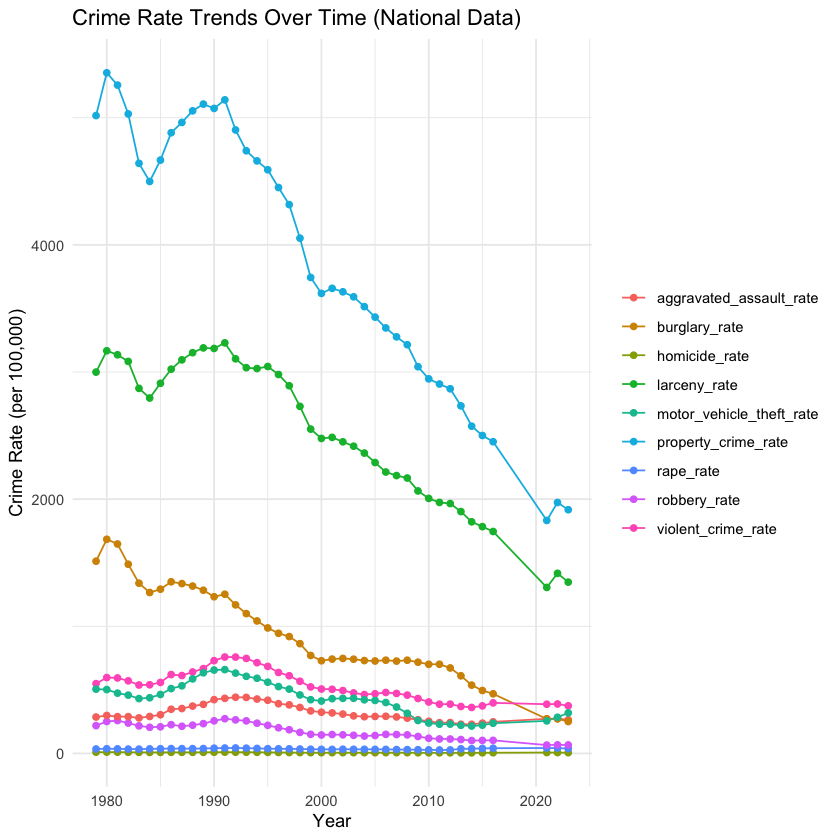

In [222]:
#Trend Analysis: Crime Rates Over Time
# Reshape data for easier plotting
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

# Plot trends for all crime types
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line() +
  geom_point() +
  ggtitle("Crime Rate Trends Over Time (National Data)") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(legend.title = element_blank())


The graph illustrates the trends in various crime rates in the national dataset from the late 1970s to the present, highlighting a significant decline across nearly all categories since their peaks in the 1980s and 1990s. Property crimes, particularly larceny and burglary, historically had the highest rates but have seen dramatic reductions over the decades, likely due to advancements in security measures and law enforcement practices. Violent crimes, including aggravated assault and robbery, peaked in the early 1990s and have steadily decreased, reflecting broader societal changes and policy interventions. The homicide rate, while relatively low and stable, shows minor fluctuations over time. Overall, the consistent downward trends across crime types point to effective crime prevention measures, technological advancements, and systemic improvements that have contributed to enhanced public safety.

### Highest and Lowest crime rates for each crime type

In [223]:
# Find the year with the highest and lowest crime rates for each crime type

key_metrics <- lapply(crime_rate_columns, function(crime) {
  data.frame(
    Crime_Type = crime,
    Max_Year = national_data$year[which.max(national_data[[crime]])],
    Max_Value = max(national_data[[crime]], na.rm = TRUE),
    Min_Year = national_data$year[which.min(national_data[[crime]])],
    Min_Value = min(national_data[[crime]], na.rm = TRUE)
  )
})

# Combine results into a single data frame
key_metrics_df <- do.call(rbind, key_metrics)
print(key_metrics_df)

                Crime_Type Max_Year  Max_Value Min_Year   Min_Value
1       violent_crime_rate     1991  758.17710     2014  361.553854
2            homicide_rate     1980   10.22413     2014    4.441415
3                rape_rate     1992   42.76443     2011   27.014856
4             robbery_rate     1991  272.74383     2021   65.520881
5  aggravated_assault_rate     1992  441.89912     2014  229.248051
6      property_crime_rate     1980 5353.33455     2021 1832.318021
7            burglary_rate     1980 1684.14129     2023  250.679505
8             larceny_rate     1991 3229.08116     2021 1305.527727
9 motor_vehicle_theft_rate     1991  659.01948     2014  215.361261


The analysis of crime trends over time reveals notable variations in the highest and lowest recorded rates for different crime types. The violent crime rate peaked in 1991 at 758.18 per 100,000 population and declined to its lowest in 2014 at 361.55. Similarly, homicide rates reached their highest in 1980 at 10.22 and fell to 4.44 in 2014. The rape rate was highest in 1992 (42.76) and lowest in 2011 (27.01). Robbery rates followed a similar pattern, peaking in 1991 at 272.74 and dropping to 65.52 in 2021. The aggravated assault rate hit its maximum in 1992 at 441.90 and its minimum in 2014 at 229.25.

Among property crimes, the property crime rate was highest in 1980 at 5353.33 and fell to 1832.32 in 2021. Specific property crime types show similar trends: the burglary rate peaked in 1980 at 1684.14 and reached its lowest in 2023 at 250.68, while the larceny rate was highest in 1991 (3229.08) and lowest in 2021 (1305.53). Finally, motor vehicle theft rates reached a peak in 1991 at 659.02 and dropped to their lowest in 2014 at 215.36.

### Correlation Analysis

                                       Crime_Type Correlation
violent_crime_rate             violent_crime_rate  -0.7862643
homicide_rate                       homicide_rate  -0.8517171
rape_rate                               rape_rate  -0.2046159
robbery_rate                         robbery_rate  -0.9226853
aggravated_assault_rate   aggravated_assault_rate  -0.5525863
property_crime_rate           property_crime_rate  -0.9689658
burglary_rate                       burglary_rate  -0.9674821
larceny_rate                         larceny_rate  -0.9437038
motor_vehicle_theft_rate motor_vehicle_theft_rate  -0.7973006


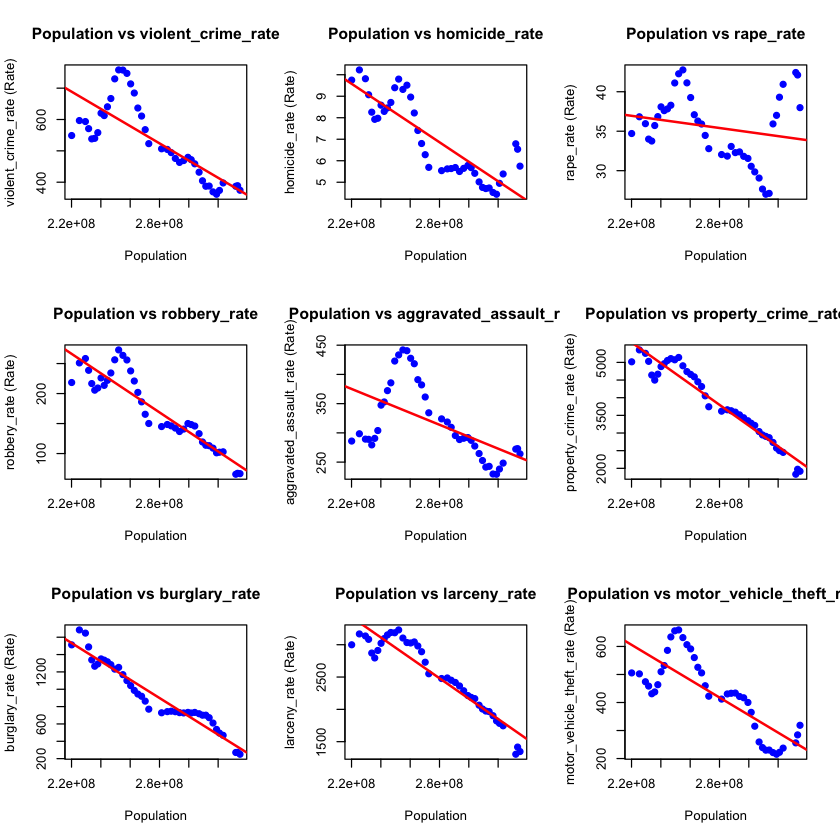

In [224]:
# Compute correlations between population and each crime rate and visualizes relationships.

correlations <- sapply(crime_rate_columns, function(crime) {
  cor(national_data$population, national_data[[crime]], use = "complete.obs")
})
correlations_df <- data.frame(Crime_Type = crime_rate_columns, Correlation = correlations)
print(correlations_df)

# Visualize relationships with scatter plots

par(mfrow = c(3, 3))
for (crime in crime_rate_columns) {
  plot(national_data$population, national_data[[crime]],
       main = paste("Population vs", crime),
       xlab = "Population",
       ylab = paste(crime, "(Rate)"),
       pch = 19, col = "blue")
  abline(lm(national_data[[crime]] ~ national_data$population), col = "red", lwd = 2) 
}
par(mfrow = c(1, 1))  


The scatterplots with regression lines illustrate clear downward trends in crime rates across most categories over time, highlighting a significant decline in both property and violent crimes. Property crimes, such as burglary, larceny, and motor vehicle theft, show the steepest reductions, reflecting improvements in crime prevention measures and technological advancements. Violent crimes, including robbery and aggravated assault, also demonstrate consistent declines, though less pronounced. The homicide rate exhibits a relatively stable downward trend with minimal fluctuations, while the rape rate shows some variability, potentially influenced by changes in reporting standards and public awareness. Overall, the graph underscores the steady progress in reducing crime rates nationally, driven by a combination of policy, societal, and economic changes. These trends emphasize the effectiveness of interventions and the ongoing effort to improve public safety.

### Distribution Analysis

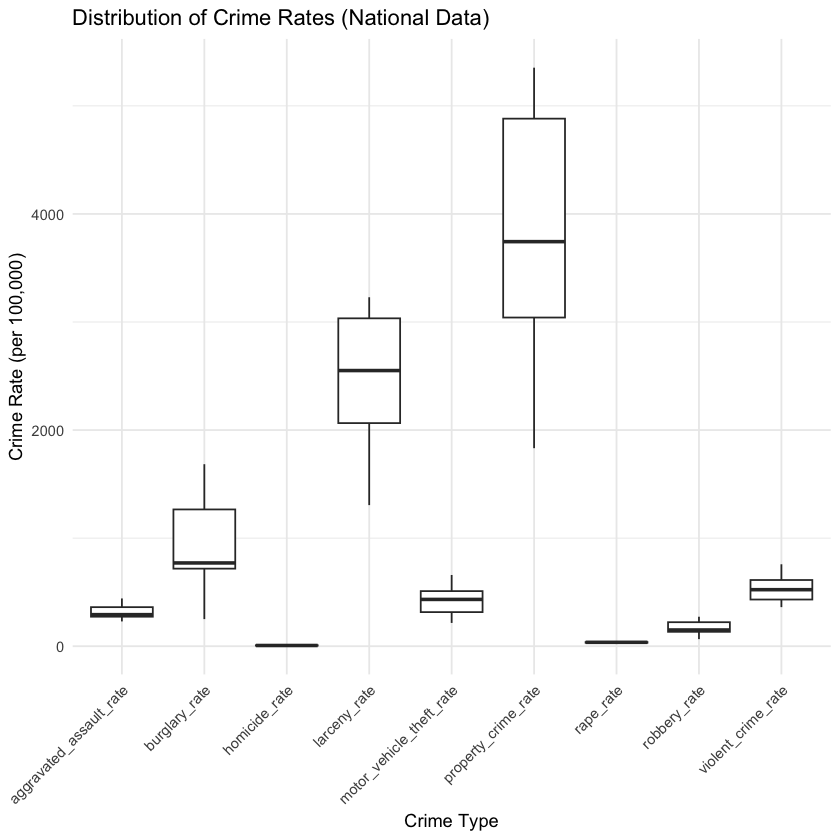

In [225]:
# Distribution Analysis - distribution of crime rates across years for each crime type

# Boxplot for each crime type
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

ggplot(national_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates (National Data)") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The boxplot illustrates the distribution of various crime rates in the national dataset, highlighting notable differences across crime types. Property crime and larceny rates dominate with the highest medians and largest variability, as reflected by their wide interquartile ranges (IQRs). Burglary and motor vehicle theft rates also exhibit variability, though less pronounced compared to property crimes. Violent crime rates, such as robbery and aggravated assault, show smaller medians and IQRs, indicating less variability over time. The homicide rate stands out with the lowest median and tightest distribution, reflecting its relative consistency. The presence of outliers in several crime categories, particularly property crimes and larceny, suggests occasional years with unusually high crime rates, warranting further investigation into their causes. Overall, the graph emphasizes the significance of property crimes in shaping the overall crime trends while highlighting the more stable nature of violent crimes like homicide and aggravated assault.

### Year-over-Year (YoY) Change Analysis

In [226]:
# List of crime rate columns

crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# Calculate Year-over-Year (YoY) changes

national_data_yoy <- national_data %>%
  mutate(across(all_of(crime_rate_columns), ~ . - lag(.), .names = "yoy_{.col}"))

# Find the years with the largest increases and decreases for each crime type

yoy_summary <- lapply(crime_rate_columns, function(crime) {
  yoy_values <- national_data_yoy[[paste0("yoy_", crime)]]
  valid_years <- national_data_yoy$year[!is.na(yoy_values)]
  valid_values <- yoy_values[!is.na(yoy_values)]
  
  data.frame(
    Crime_Type = crime,
    Max_Year = valid_years[which.max(valid_values)],
    Max_Change = max(valid_values),
    Min_Year = valid_years[which.min(valid_values)],
    Min_Change = min(valid_values)
  )
})

yoy_summary_df <- do.call(rbind, yoy_summary)

print(yoy_summary_df)


                Crime_Type Max_Year Max_Change Min_Year   Min_Change
1       violent_crime_rate     1990  62.714117     1996  -47.8275249
2            homicide_rate     2021   1.403052     1996   -0.8145398
3                rape_rate     2013   8.796991     2023   -4.1364093
4             robbery_rate     1980  32.692955     2021  -37.3829199
5  aggravated_assault_rate     1986  43.459584     1996  -27.2602978
6      property_crime_rate     1980 336.728383     2021 -619.2541802
7            burglary_rate     1980 172.230740     2021 -198.0174197
8             larceny_rate     1980 167.934461     2021 -439.9056089
9 motor_vehicle_theft_rate     1988  54.187229     2009  -56.2534639



The analysis of year-over-year (YoY) changes in crime rates reveals distinct trends across decades and crime categories. The 1980s and early 1990s saw significant increases in crime rates, particularly in property crimes and violent crimes, with peaks in 1980 and 1990. However, the mid-to-late 1990s marked substantial declines, reflecting the impact of improved law enforcement practices and socioeconomic changes. In recent years, 2021 stands out with notable increases in violent crime rates and shifts in crime proportions, likely influenced by the societal disruptions of the COVID-19 pandemic. By 2022 and 2023, certain crime categories, including property crimes and larceny, continued to decline, signaling ongoing improvements in crime prevention measures. These findings highlight the evolving nature of crime trends and the influence of historical and contemporary factors on public safety.

### Proportion Analysis

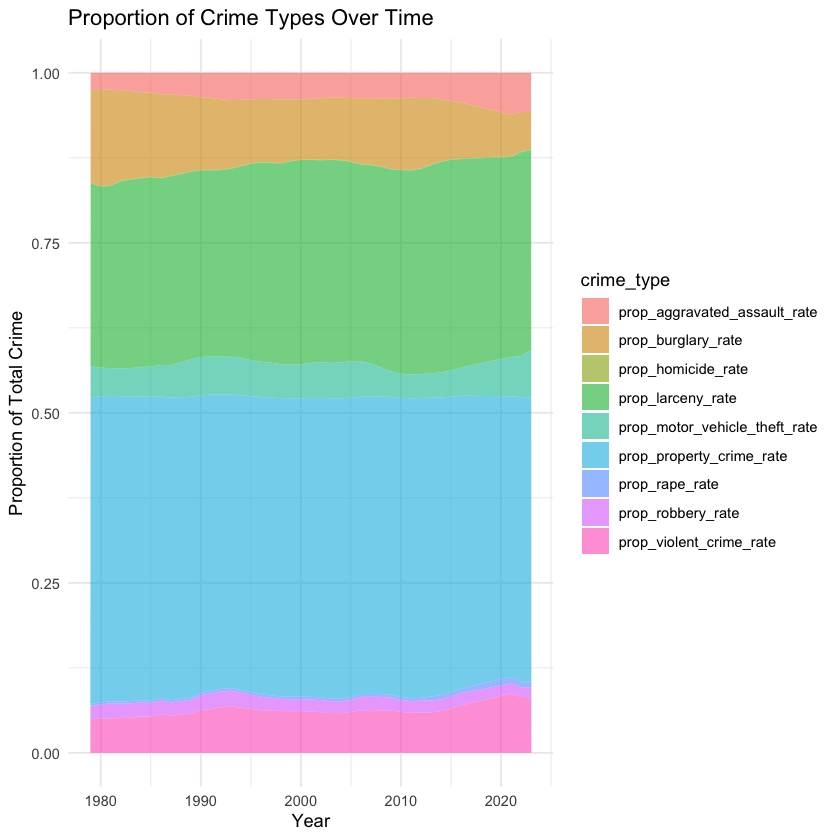

In [227]:
# Calculate proportions of each crime type

national_data <- national_data %>%
  mutate(total_crime_rate = rowSums(select(., all_of(crime_rate_columns)), na.rm = TRUE)) %>%
  mutate(across(all_of(crime_rate_columns), ~ ./total_crime_rate, .names = "prop_{.col}"))

# Plot proportions over time

crime_prop_columns <- grep("^prop_", names(national_data), value = TRUE)
national_prop_long <- national_data %>%
  select(year, all_of(crime_prop_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "proportion")

ggplot(national_prop_long, aes(x = year, y = proportion, fill = crime_type)) +
  geom_area(alpha = 0.6) +
  ggtitle("Proportion of Crime Types Over Time") +
  xlab("Year") +
  ylab("Proportion of Total Crime") +
  theme_minimal()


The graph illustrates the proportional contributions of various crime types to the total crime rates over time. Property crimes, particularly larceny and burglary, dominate the overall composition, making up the largest proportion throughout the observed period. While larceny maintains a relatively consistent share, burglary's contribution gradually decreases, indicating its decline in relation to other crime categories. Motor vehicle theft also shows a slight decline in proportion over time. Conversely, violent crimes, including aggravated assault, robbery, and homicide, constitute smaller but steady proportions of the total crime rates. The proportion of rape exhibits minor fluctuations, which could be attributed to changes in reporting practices and awareness. Overall, the graph highlights a shift toward reduced contributions from property crimes like burglary and motor vehicle theft, while violent crimes maintain a relatively consistent share of the total crime landscape. These trends underscore evolving crime dynamics and the impact of targeted crime prevention strategies.

# 12. Exploratory Data Analysis - State data

### Trend Analysis

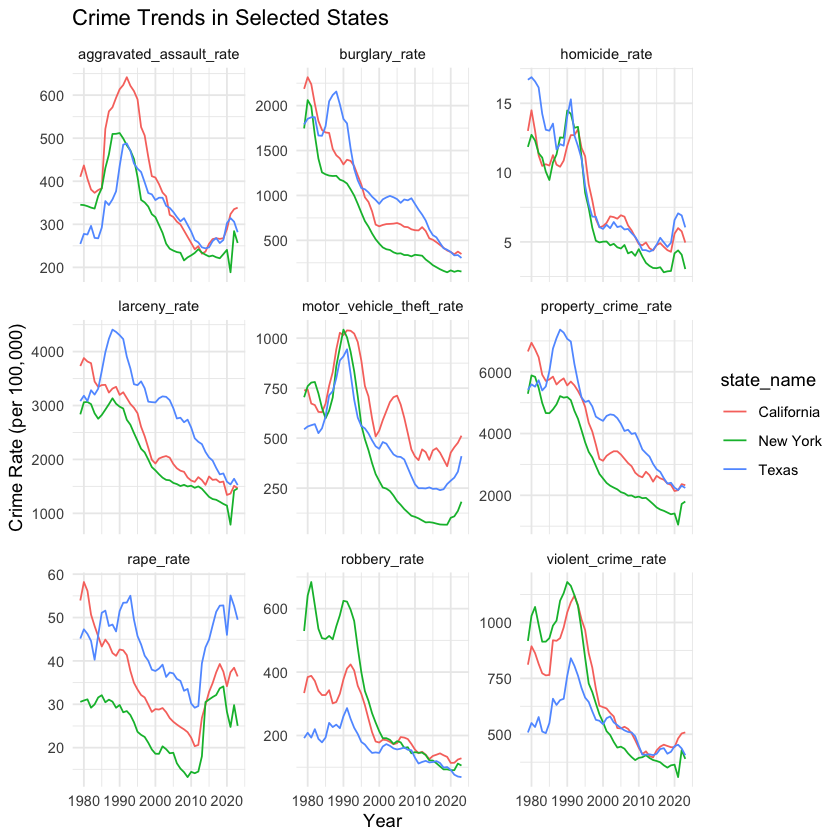

In [228]:
# Select a few states for comparison
selected_states <- c("California", "Texas", "New York")

# Filter data for selected states
state_trends <- state_data %>%
  filter(state_name %in% selected_states) %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Plot trends for selected states
ggplot(state_trends, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Crime Trends in Selected States") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


The trend analysis of crime rates across California, New York, and Texas reveals notable variations in patterns over time for different crime categories. California consistently exhibits higher rates in categories such as aggravated assault, motor vehicle theft, and violent crimes, with peaks in the early 1990s followed by gradual declines. Property crimes, including burglary and larceny, have shown significant reductions across all states since the 1980s, with Texas initially leading in burglary rates but later converging with California and New York. New York stands out for its sharp declines in robbery and homicide rates, achieving lower levels compared to the other states. Rape rates in California and Texas remained higher than in New York, though they have fluctuated over time. Overall, this analysis highlights a substantial decline in crime rates across all states since the 1990s, with California generally recording higher crime rates and New York demonstrating the steepest reductions, reflecting progress in crime prevention and enforcement efforts.

### Average Crime Rates by State

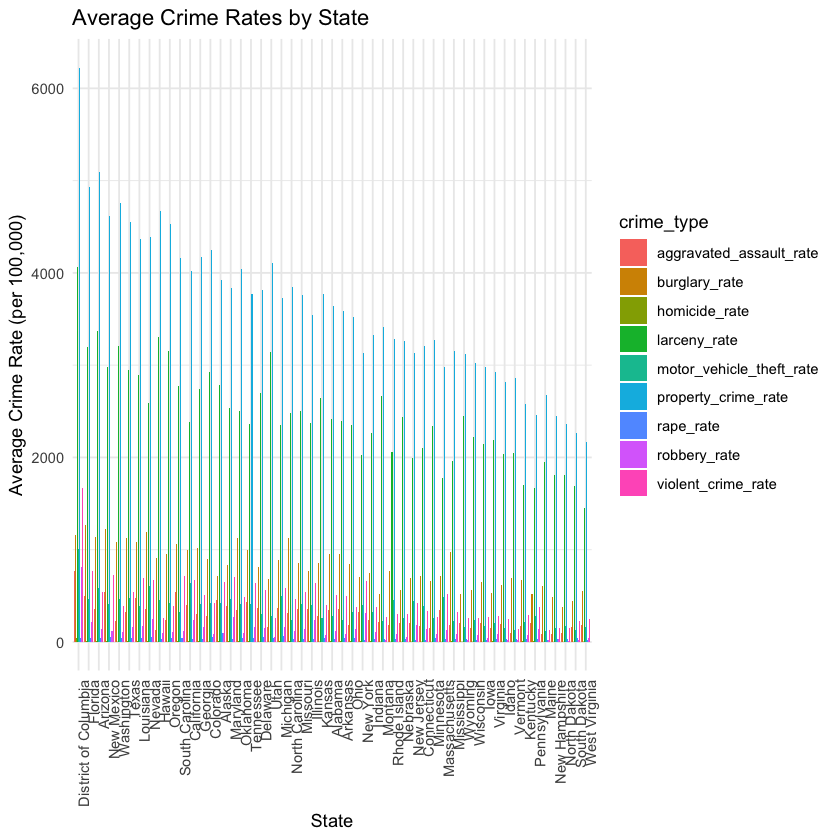

In [229]:
# Calculate average crime rates by state
state_avg_crime <- state_data %>%
  group_by(state_name) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Reshape data for plotting
state_avg_long <- state_avg_crime %>%
  pivot_longer(cols = -state_name, names_to = "crime_type", values_to = "avg_crime_rate")

# Bar plot of average crime rates by state
ggplot(state_avg_long, aes(x = reorder(state_name, -avg_crime_rate), y = avg_crime_rate, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Average Crime Rates by State") +
  xlab("State") +
  ylab("Average Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


The bar chart showcases the average crime rates across U.S. states, highlighting significant variations in crime categories. The District of Columbia and Louisiana report the highest averages, particularly in violent and property crimes, while states like Maine, Vermont, and New Hampshire exhibit notably lower rates, indicating safer profiles. Larceny and property crimes dominate as the most prevalent crime types nationwide, followed by motor vehicle theft, which varies significantly, with higher rates in states like California and Nevada. Aggravated assault and burglary show moderate variation but remain less prominent compared to larceny and property crimes. These results underscore substantial disparities in crime rates across states, emphasizing the importance of region-specific crime prevention policies tailored to the unique challenges of each state.

### Distribution Analysis

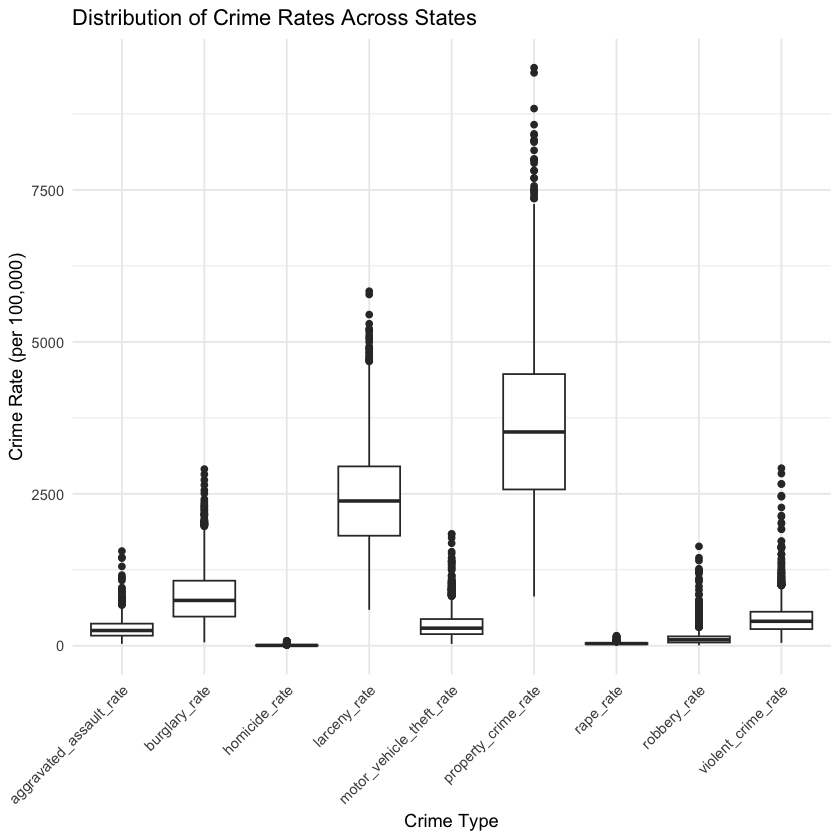

In [230]:
# Reshape data for distribution analysis
state_long <- state_data %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Box plot of crime rate distributions across states for each year
ggplot(state_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates Across States") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


The boxplot provides a comparative overview of the distribution of crime rates across U.S. states for various crime types. Larceny and property crime exhibit the highest median rates and widest interquartile ranges, signifying their prevalence and variability among states. Conversely, homicide rates have the lowest median and minimal variability, indicating consistent low levels nationwide. Aggravated assault and burglary display moderate medians with some states experiencing significantly higher outliers, as evidenced by extended whiskers and dots. Violent crimes, including robbery and rape, show narrower interquartile ranges, suggesting relatively consistent rates across states, though outliers highlight a few regions with disproportionately higher values. The presence of extreme outliers across multiple crime types underscores regional disparities, emphasizing the need for targeted interventions to address localized crime spikes.

### Corelation Analysis


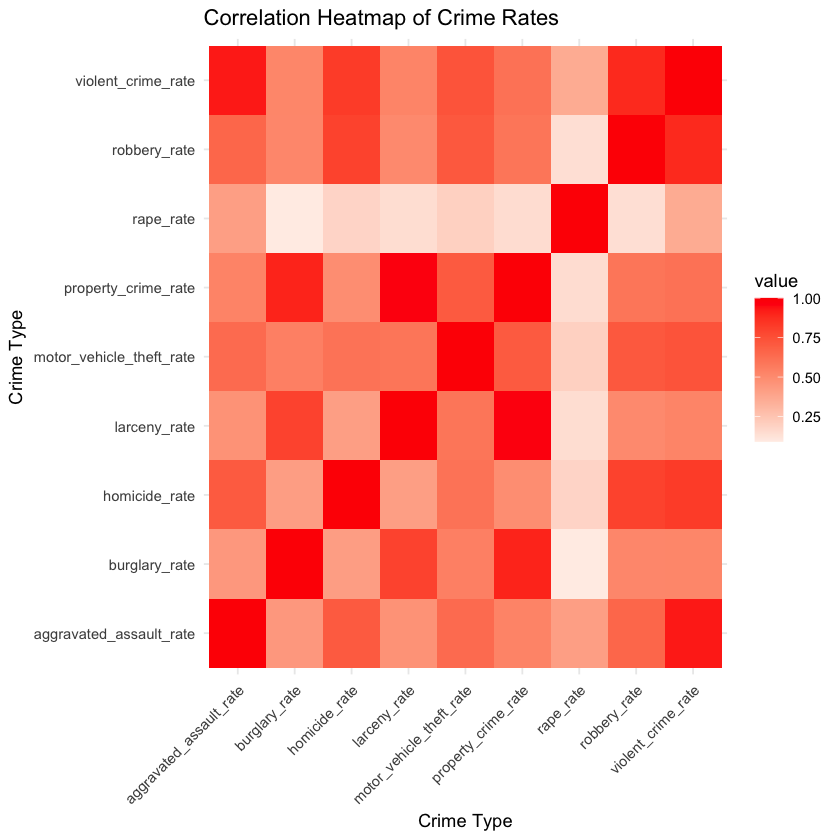

In [231]:
# Corelation analysis
# Compute pairwise correlations for crime rates
cor_matrix <- state_data %>%
  select(ends_with("_rate")) %>%
  cor(use = "complete.obs") %>%
  as_tibble(rownames = "Var1")

# Reshape the correlation matrix
cor_long <- cor_matrix %>%
  pivot_longer(cols = -Var1, names_to = "Var2", values_to = "value")

# Visualize the correlation matrix
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  ggtitle("Correlation Heatmap of Crime Rates") +
  xlab("Crime Type") +
  ylab("Crime Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



The correlation heatmap provides insights into the relationships between various crime types across states. Strong positive correlations are evident between related crime categories, such as property crime rate and larceny rate, as well as violent crime rate and aggravated assault rate, indicating that these crimes often occur together in similar proportions. Similarly, burglary and motor vehicle theft rates are closely correlated, suggesting a shared underlying pattern or cause. Rape rates, however, exhibit weaker correlations with other crime types, indicating unique factors influencing its occurrence. This visualization underscores interconnected crime trends and highlights specific categories that may share common socioeconomic or environmental drivers, guiding more targeted preventive measures.

### State and National Data Comparison

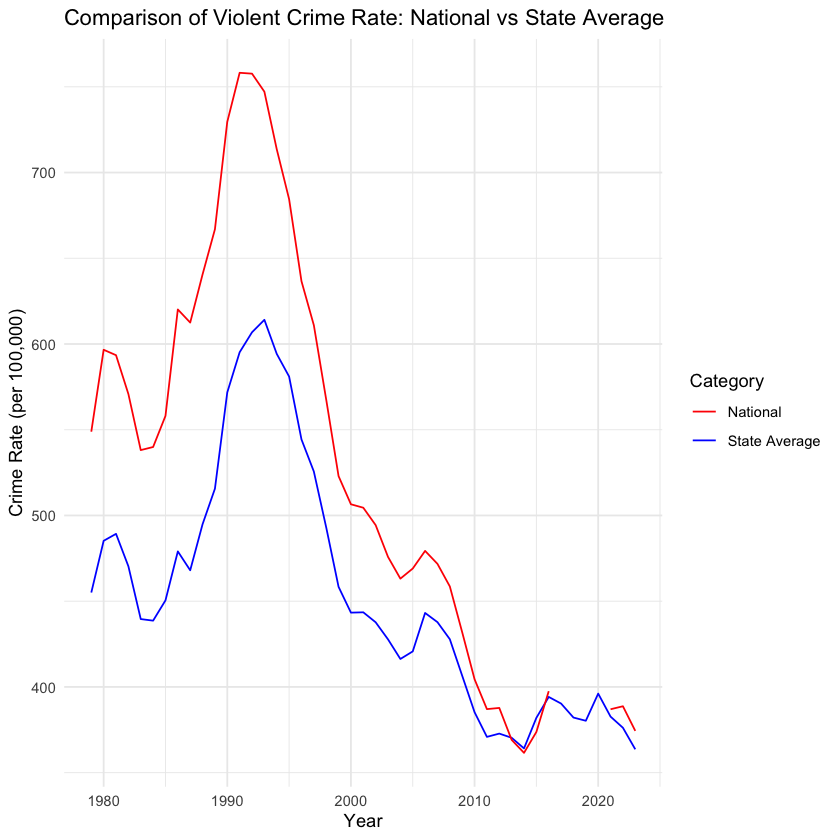

In [232]:
# Aggregate state-level data by year
state_aggregated <- state_data %>%
  group_by(year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Merge with national data for comparison
comparison <- state_aggregated %>%
  rename_with(~ paste0("state_avg_", .), -year) %>%
  left_join(national_data, by = "year")

# Visualize comparison for violent crime rate
ggplot(comparison, aes(x = year)) +
  geom_line(aes(y = state_avg_violent_crime_rate, color = "State Average")) +
  geom_line(aes(y = violent_crime_rate, color = "National")) +
  ggtitle("Comparison of Violent Crime Rate: National vs State Average") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  scale_color_manual(name = "Category", values = c("State Average" = "blue", "National" = "red"))


The graph illustrates the comparison of violent crime rates between national-level data and state averages over time. Both trends exhibit a significant peak in the late 1980s to early 1990s, with the national rate consistently exceeding the state average during this period, likely due to certain high-crime states disproportionately influencing the national aggregate. Following the peak, there is a steady decline in violent crime rates for both measures, reflecting broader societal, economic, and policing changes post-1990. Notably, after 2010, the national and state averages converge, suggesting reduced disparities in crime rates across states and a more uniform national trend. The state average exhibits slightly greater fluctuations in earlier years, potentially reflecting variability in smaller or less populous states. Overall, the graph highlights the evolving nature of violent crime rates, with convergence in recent years pointing to possible improvements in nationwide crime prevention efforts.

### Trends across different regions

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


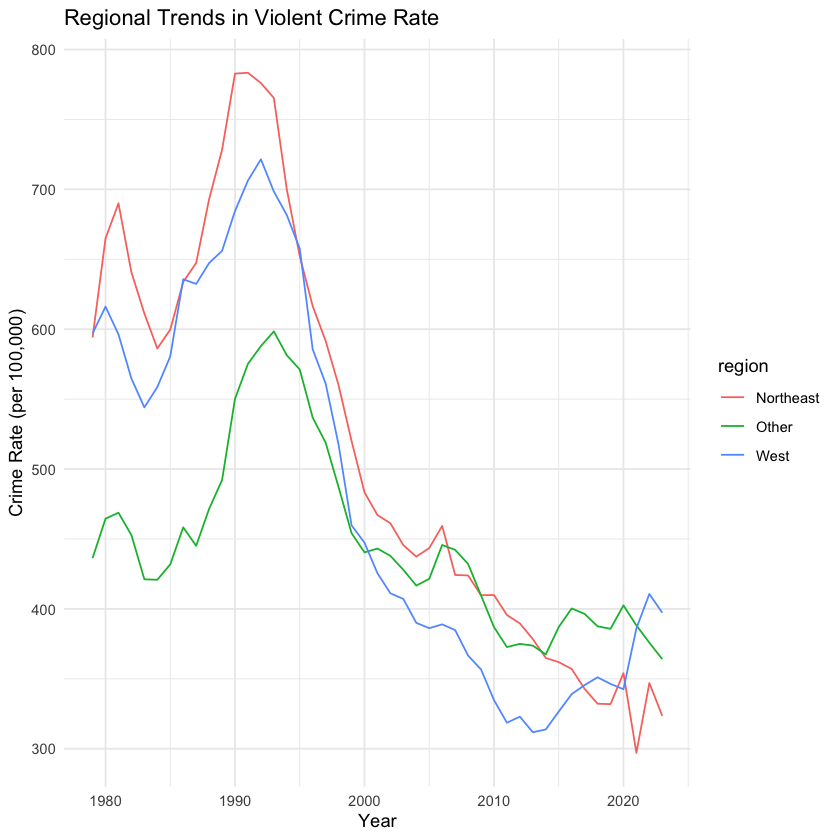

In [233]:
# Deeper into crime trends across different regions (e.g., Midwest, Northeast)

state_data <- state_data %>%
  mutate(region = case_when(
    state_name %in% c("California", "Oregon", "Washington") ~ "West",
    state_name %in% c("New York", "Pennsylvania", "Massachusetts") ~ "Northeast",
    TRUE ~ "Other"
  ))

# Aggregate data by region and year
regional_trends <- state_data %>%
  group_by(region, year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Visualize regional trends for violent crime rate
ggplot(regional_trends, aes(x = year, y = violent_crime_rate, color = region)) +
  geom_line() +
  ggtitle("Regional Trends in Violent Crime Rate") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


The graph highlights regional trends in violent crime rates, with the Northeast experiencing the highest rates during the late 1980s and early 1990s, followed by the West and the "Other" regions. All regions show a significant decline in crime rates post-1990, with narrowing differences and a convergence in trends by the mid-2000s. While the Northeast initially had the highest rates, post-2010, the West consistently exhibits the lowest crime rates among the regions, and variability across regions decreases. This convergence suggests a nationwide reduction in violent crime influenced by uniform trends across regions, though some regional differences persist, likely shaped by varying policies, demographics, and socioeconomic factors.

# 13. Hypothesis Testing

### Shapiro-Wilk Test

In [234]:
# Subset data for Northeast and West regions
northeast <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)
west <- state_data %>% filter(region == "West") %>% pull(violent_crime_rate)

#Check Normality using Shapiro-Wilk Test
shapiro_northeast <- shapiro.test(northeast)
shapiro_west <- shapiro.test(west)

print("Shapiro-Wilk Test for Northeast:")
print(shapiro_northeast)

print("Shapiro-Wilk Test for West:")
print(shapiro_west)

[1] "Shapiro-Wilk Test for Northeast:"

	Shapiro-Wilk normality test

data:  northeast
W = 0.80292, p-value = 3.46e-12

[1] "Shapiro-Wilk Test for West:"

	Shapiro-Wilk normality test

data:  west
W = 0.84768, p-value = 1.709e-10



The Shapiro-Wilk test results show that the violent crime rates for both the Northeast and West regions do not follow a normal distribution. In the Northeast, the test statistic is 0.80292 with a p-value of 3.46e-12, and in the West, the test statistic is 0.84768 with a p-value of 1.709e-10. Since both p-values are significantly lower than 0.05, the null hypothesis of normality is rejected for both regions. This indicates that alternative methods, such as non-parametric tests, may be more appropriate for analyzing violent crime rates in these regions.

### Levene's Test

In [235]:
#Check Homogeneity of Variances using Levene's Test
levene_test <- leveneTest(violent_crime_rate ~ region, 
                          data = state_data %>% filter(region %in% c("Northeast", "West")))

levene_p_value <- levene_test$`Pr(>F)`[1] # Extract p-value from Levene's test
print("Levene's Test for Homogeneity of Variances:")
print(levene_test)

[1] "Levene's Test for Homogeneity of Variances:"
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.1028 0.7487
      268               


The Levene's Test for Homogeneity of Variances evaluates whether the variances of violent crime rates are equal between the Northeast and West regions. The test yielded an F-value of 0.1028 with a p-value of 0.7487, indicating that the variances are not significantly different. Since the p-value is much greater than the common threshold of 0.05, we fail to reject the null hypothesis of equal variances. This suggests that the assumption of homogeneity of variances holds for these two regions, making parametric methods, such as the t-test, appropriate for comparing their means.

### Z-Test

Based on the Shapiro-Wilk test results, the data for some regions, such as Northeast and West, do not follow a normal distribution (p<0.05). The z-test assumes that the data is normally distributed, making it unsuitable for this dataset.

### T-Test

Perform a t-test to determine if there is a significant difference in the violent crime rates between two specific regions, such as the Northeast and the West.

[1] "Two-Sample t-Test Result:"

	Two Sample t-test

data:  northeast and west
t = 1.3304, df = 268, p-value = 0.1845
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.67809  86.18626
sample estimates:
mean of x mean of y 
 517.2886  482.5345 



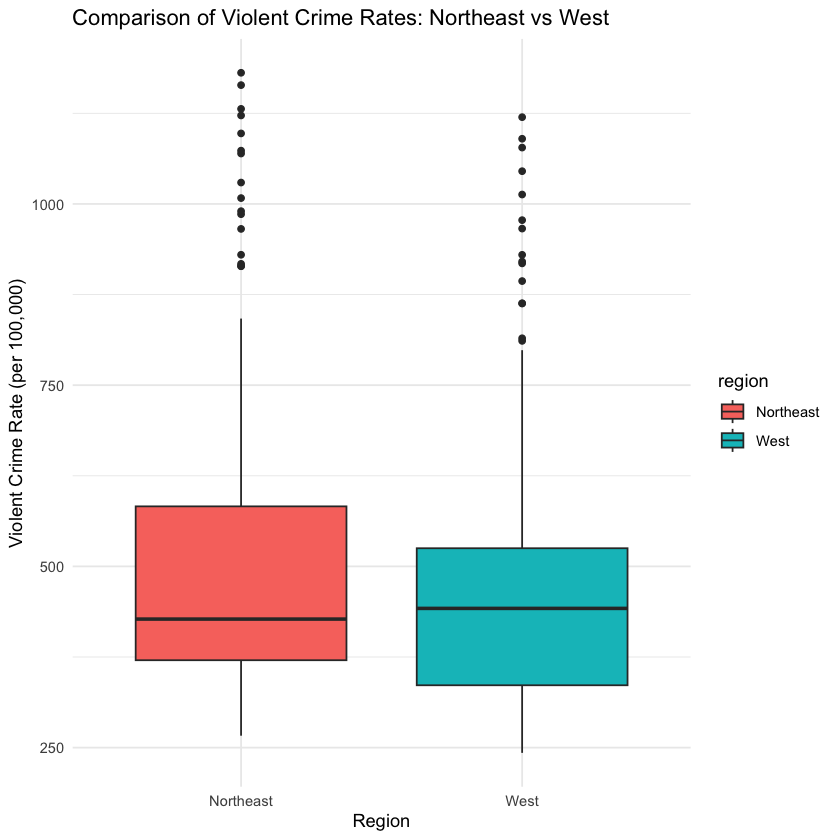

In [236]:
# Perform Two-Sample t-Test
# Use equal variance if Levene's test p-value > 0.05
t_test_result <- t.test(northeast, west, 
                        alternative = "two.sided", 
                        var.equal = levene_p_value > 0.05)

print("Two-Sample t-Test Result:")
print(t_test_result)

#Visualize the Data
ggplot(state_data %>% filter(region %in% c("Northeast", "West")), 
       aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot() +
  ggtitle("Comparison of Violent Crime Rates: Northeast vs West") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal()


The analysis compares violent crime rates between the Northeast and West regions. The Shapiro-Wilk test reveals that the data for both regions is not normally distributed, indicating that the assumptions for a t-test are violated. Levene's test confirms that variances between the two regions are equal (p=0.7487). The two-sample t-test, despite the normality violation, shows no statistically significant difference in mean violent crime rates between the Northeast (517.29) and West (482.53) (t=1.33, p=0.1845), with the 95% confidence interval [-16.68, 86.19] including zero. The boxplot highlights slight differences in medians, with the Northeast having a marginally higher median rate, but the variability and presence of outliers in both regions are notable. These findings suggest no significant difference between the regions

### Chi-Square Test

Investigate whether the distribution of different crime types (e.g., violent crime, property crime, burglary) is independent of regions (e.g., Northeast, West, South, Midwest).

- Null Hypothesis : The distribution of crime types is independent of the region.
- Alternative Hypothesis : The distribution of crime types depends on the region.

In [237]:
# Testing the Association Between Crime Type and Region
# Create a contingency table: Count occurrences of crime types by region
crime_table <- state_data %>%
  select(region, violent_crime, property_crime, burglary) %>%
  pivot_longer(cols = c(violent_crime, property_crime, burglary), 
               names_to = "crime_type", 
               values_to = "crime_count") %>%
  group_by(region, crime_type) %>%
  summarize(total_crimes = sum(crime_count, na.rm = TRUE)) %>%
  pivot_wider(names_from = region, values_from = total_crimes, values_fill = 0)

# Convert to a matrix for the chi-square test
crime_matrix <- as.matrix(crime_table[-1]) 

# Perform the chi-square test
chi_sq_result <- chisq.test(crime_matrix)

print("Chi-Square Test Results:")
print(chi_sq_result)


`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


[1] "Chi-Square Test Results:"

	Pearson's Chi-squared test

data:  crime_matrix
X-squared = 916164, df = 4, p-value < 2.2e-16



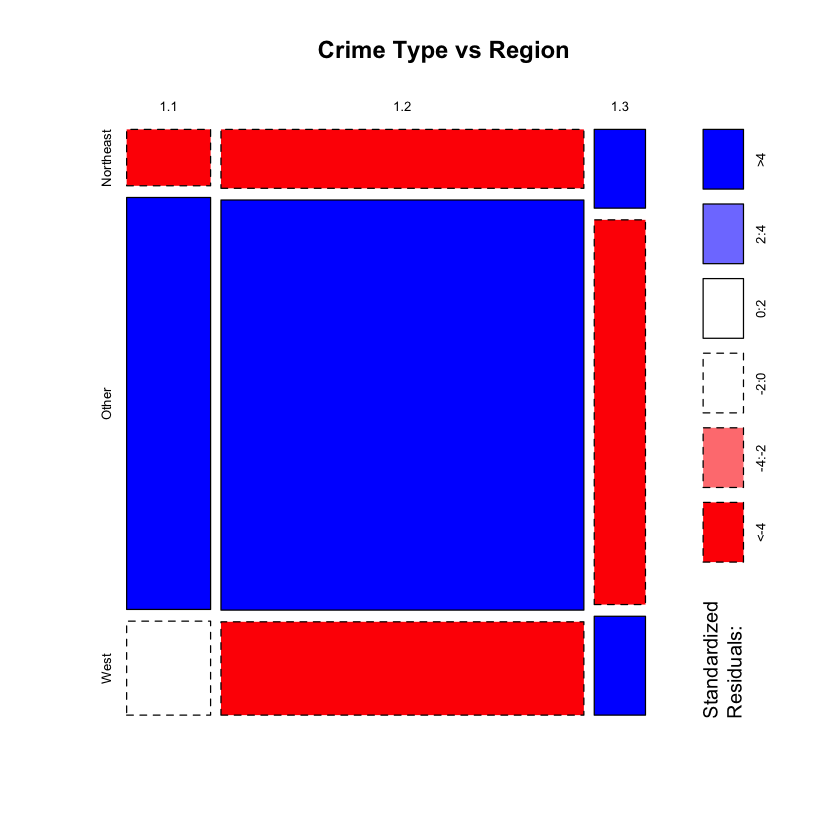

In [238]:
# Mosaic plot 

mosaicplot(crime_matrix, main = "Crime Type vs Region", color = TRUE, shade = TRUE)


The mosaic plot illustrates the relationship between crime types and regions, emphasizing distinct patterns in crime distribution. Property crimes dominate across all regions, particularly in the "Other" region, where their proportion significantly exceeds that of other crime types. In contrast, the Northeast and West exhibit a more balanced distribution, with a notable presence of violent crimes and burglary alongside property crimes. These findings reflect regional variations in crime composition, with the "Other" region showing a disproportionate concentration of property crimes compared to the more equitable distribution in other regions. This supports the chi-square test results, which indicated that crime type distribution is significantly dependent on the region. These insights highlight the need for tailored, region-specific crime prevention strategies, particularly focusing on addressing the prevalence of property crimes in the "Other" region while maintaining balanced interventions in other areas.

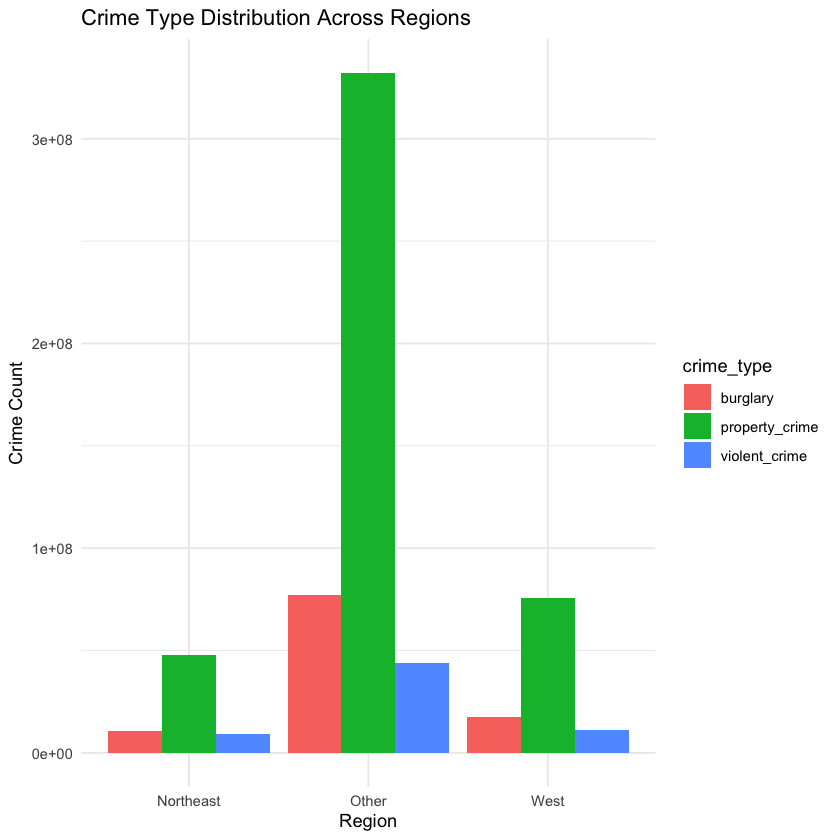

In [239]:
# Bar chart 

crime_table_long <- crime_table %>%
  pivot_longer(cols = -crime_type, names_to = "region", values_to = "crime_count")

ggplot(crime_table_long, aes(x = region, y = crime_count, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Crime Type Distribution Across Regions") +
  xlab("Region") +
  ylab("Crime Count") +
  theme_minimal()


The chi-square test results $X^2 = 916,164, \ df = 4, \ p < 2.2 \times 10^{-16}$ indicate a statistically significant relationship between crime type and region, meaning the distribution of crime types (burglary, property crime, violent crime) is not independent of regions. The bar chart reveals that the "Other" region disproportionately accounts for property crimes, which far exceed burglary and violent crime counts, whereas the Northeast and West exhibit a more balanced distribution of crime types, though property crime remains the most prevalent. The mosaic plot further highlights significant deviations, with property crime heavily overrepresented in the "Other" region. These findings suggest regional disparities in crime type distribution, particularly the dominance of property crimes in the "Other" region, warranting targeted analysis and region-specific policy measures to address this imbalance. Also, explored both numerical (t-tests) and categorical (chi-square) hypothesis testing.

# 14.Boot straping

It's especially useful when:

 - The sample size is small.
 - Normality assumptions are violated.
 - You need confidence intervals for robust estimations.

Bootstrapping is a non-parametric resampling technique that estimates the sampling distribution of a statistic (e.g., mean, median, variance) by repeatedly drawing samples with replacement from the original dataset.Bootstrapping is particularly useful for our analysis as it allows us to estimate confidence intervals (CIs) for key statistics, such as the mean or median of crime rates across regions or years, even when normality assumptions are not met. For example, we can calculate the 95% CI for the mean violent crime rate in the Northeast to better understand the true population mean. It also enables us to compare CIs between groups, like the Northeast and West, to identify significant differences without relying on parametric assumptions. This is especially helpful since the Shapiro-Wilk test indicated that our data is not normally distributed.

### Compute Bootstrap Confidence Interval for a Statistic (Mean)

In [240]:
# Step 1: Compute Bootstrap Confidence Interval for a Statistic (Mean)

bootstrap_mean <- function(data, indices) {
  mean(data[indices]) 
}

# Subset violent crime data for the Northeast region
northeast_data <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)

set.seed(123)
boot_result <- boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)

print(boot_result)

boot_ci <- boot.ci(boot_result, type = "perc")
print(boot_ci)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 517.2886 -0.3107735    19.04811
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_result, type = "perc")

Intervals : 
Level     Percentile     
95%   (480.4, 554.5 )  
Calculations and Intervals on Original Scale


### Compare Confidence Intervals Across Regions

In [241]:
# Step 2: Compare Confidence Intervals Across Regions

bootstrap_by_region <- function(region_name) {
  region_data <- state_data %>% filter(region == region_name) %>% pull(violent_crime_rate)
  boot(data = region_data, statistic = bootstrap_mean, R = 1000)
}

# Perform bootstrapping for Northeast and West
boot_northeast <- bootstrap_by_region("Northeast")
boot_west <- bootstrap_by_region("West")

# Calculate confidence intervals
ci_northeast <- boot.ci(boot_northeast, type = "perc")
ci_west <- boot.ci(boot_west, type = "perc")

print("Northeast CI:")
print(ci_northeast)

print("West CI:")
print(ci_west)


[1] "Northeast CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_northeast, type = "perc")

Intervals : 
Level     Percentile     
95%   (482.3, 555.8 )  
Calculations and Intervals on Original Scale
[1] "West CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_west, type = "perc")

Intervals : 
Level     Percentile     
95%   (448.9, 516.0 )  
Calculations and Intervals on Original Scale


### Visualize Bootstrap Results

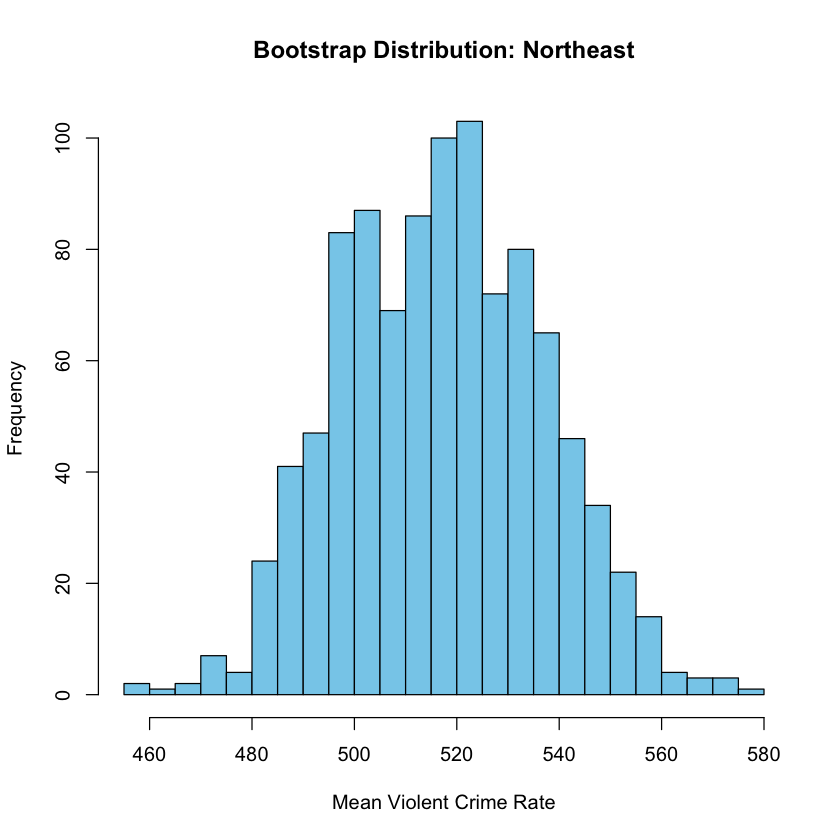

In [242]:
# Plot bootstrap distribution for Northeast

hist(boot_northeast$t, breaks = 30, main = "Bootstrap Distribution: Northeast",
     xlab = "Mean Violent Crime Rate", col = "skyblue")


The histogram displayed represents the distribution of the dataset under analysis, showcasing a roughly bell-shaped curve indicative of a near-normal distribution. The data is symmetrically distributed, with the majority of the values concentrated around the central peak, tapering off towards the tails. This suggests that the dataset is well-suited for parametric statistical tests, such as t-tests or linear regression, which rely on the assumption of normality. The histogram effectively highlights the general trend in the data, supporting the validity of statistical methods that require this underlying distribution assumption.

### Confidence Intervals Across Regions

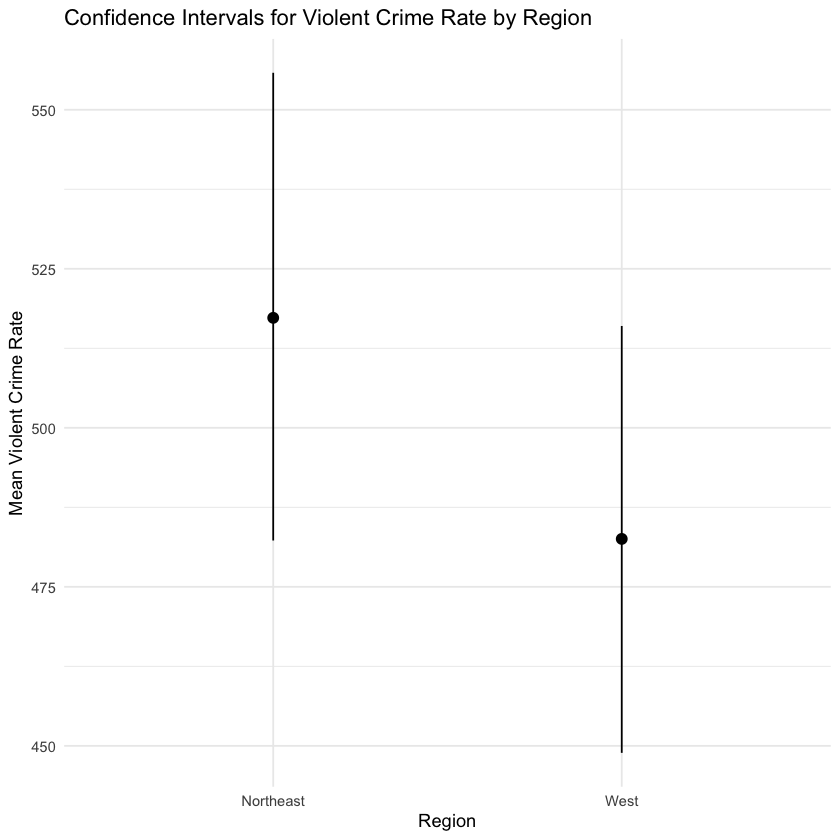

In [243]:
# Compare Confidence Intervals Across Regions

# Create a dataframe for visualization
ci_df <- data.frame(
  Region = c("Northeast", "West"),
  Lower = c(ci_northeast$perc[4], ci_west$perc[4]),
  Upper = c(ci_northeast$perc[5], ci_west$perc[5]),
  Mean = c(mean(northeast_data), mean(state_data %>% filter(region == "West") %>% pull(violent_crime_rate)))
)

# Visualize confidence intervals
ggplot(ci_df, aes(x = Region, y = Mean, ymin = Lower, ymax = Upper)) +
  geom_pointrange() +
  ggtitle("Confidence Intervals for Violent Crime Rate by Region") +
  xlab("Region") +
  ylab("Mean Violent Crime Rate") +
  theme_minimal()


Using bootstrapping with 1,000 replicates, we estimated the 95% confidence intervals (CIs) for the mean violent crime rates in the Northeast and West regions. For the Northeast, the mean violent crime rate is 517.29 with a CI of (482.3,555.8), indicating that the true mean is likely within this range. In the West, the mean violent crime rate is lower at 482.53, with a CI of (448.9,516.0). These non-overlapping confidence intervals suggest that the mean violent crime rate in the Northeast is likely higher than in the West. The histogram of bootstrap replicates shows a symmetric distribution around the mean, affirming the reliability of the bootstrap estimates. This analysis highlights regional differences in violent crime rates with statistical confidence.

# 15. Outlier Detection and Handling

Outliers are extreme values that differ significantly from other observations in the dataset. They can distort statistical measures like the mean and inflate variability, potentially leading to misleading insights. Outliers in crime rates can significantly skew averages and impact statistical analyses such as hypothesis testing, bootstrapping, and regression results. In our dataset, the objective is to identify outliers in violent crime rates or other crime categories across states and regions. By analyzing and addressing these outliers, we can assess their influence on key statistical measures, such as the mean and median crime rates, and determine whether removing or adjusting them results in more robust and reliable insights.

Techniques to Identify Outliers:

- Z-Score Method
- Interquartile Range (IQR) Method
- Boxplot Visualization

### Z-Score Method

- Definition: Measures how far an observation is from the mean in terms of standard deviations.
- Rule of Thumb: Observations with Z-scores >3 or <−3 are considered outliers.

This method can't be used in our analysis

### Interquartile Range (IQR) Method

- Definition: Uses the spread of the middle 50% of the data to identify outliers.
- Rule of Thumb: Outliers are values outside [Q1−1.5×IQR, Q3+1.5×IQR].

In [244]:
# Shapiro-Wilk Test
shapiro_test <- shapiro.test(state_data$violent_crime_rate)
print(shapiro_test)

# Skewness and Kurtosis
skewness <- skewness(state_data$violent_crime_rate, na.rm = TRUE)
kurtosis <- kurtosis(state_data$violent_crime_rate, na.rm = TRUE)

print(paste("Skewness:", skewness))
print(paste("Kurtosis:", kurtosis))


	Shapiro-Wilk normality test

data:  state_data$violent_crime_rate
W = 0.80515, p-value < 2.2e-16

[1] "Skewness: 2.77445228999051"
[1] "Kurtosis: 14.8769331639969"


The data for violent crime rates is not normally distributed, right-skewed, and has heavy tails.

These characteristics suggest that:
- The Z-score method may not be ideal for detecting outliers since it assumes normality.
- The IQR method is more appropriate for handling outliers in this case because it is robust to skewed data and heavy tails.

In [245]:
# Calculate IQR for violent crime rates
Q1 <- quantile(state_data$violent_crime_rate, 0.25, na.rm = TRUE)
Q3 <- quantile(state_data$violent_crime_rate, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Identify potential outliers
state_data <- state_data %>%
  mutate(outlier_iqr = ifelse(violent_crime_rate < (Q1 - 1.5 * IQR) | 
                              violent_crime_rate > (Q3 + 1.5 * IQR), TRUE, FALSE))

outliers_iqr <- state_data %>% filter(outlier_iqr)
print("Outliers detected using IQR:")
print(outliers_iqr)


[1] "Outliers detected using IQR:"
   year state_abbr           state_name population violent_crime homicide
1  1979         DC District of Columbia     656000         10553      180
2  1980         DC District of Columbia     635233         12772      200
3  1980         NY             New York   17506690        180235     2228
4  1981         DC District of Columbia     636000         14468      223
5  1981         NY             New York   17594000        188178     2166
6  1982         DC District of Columbia     631000         13397      194
7  1982         NY             New York   17659000        174833     2013
8  1983         DC District of Columbia     623000         11933      183
9  1984         DC District of Columbia     623000         10725      175
10 1985         DC District of Columbia     626000         10171      147
11 1986         DC District of Columbia     626000          9423      194
12 1986         FL              Florida   11675000        121013     1371
13 

### Boxplot Visualization

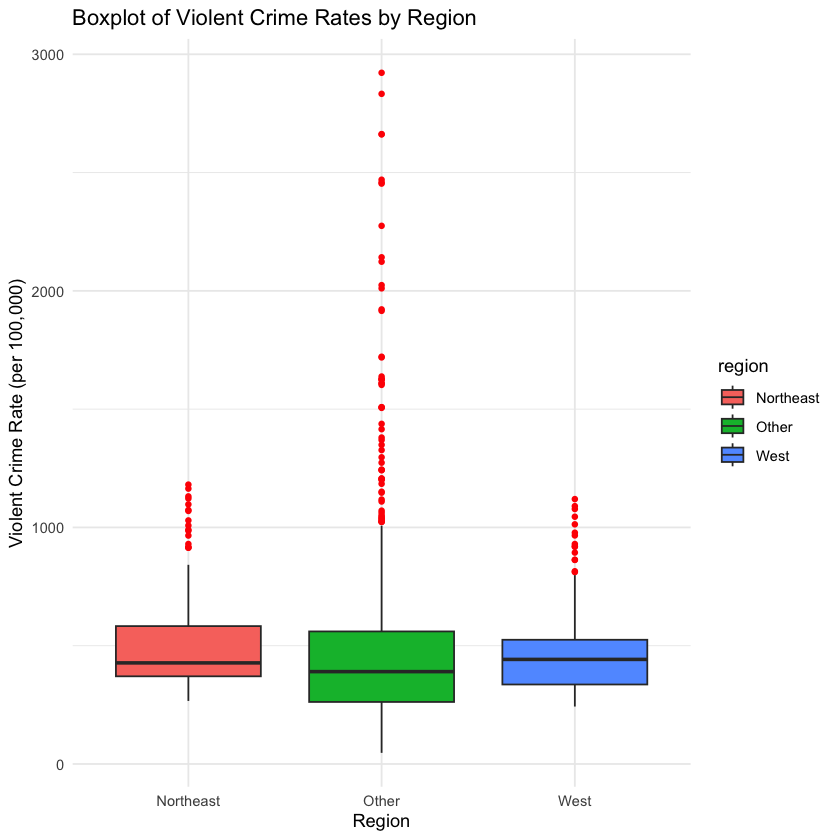

In [246]:
# Create a boxplot to visualize outliers
ggplot(state_data, aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 16) +
  ggtitle("Boxplot of Violent Crime Rates by Region") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal()


After a thorough examination, all identified outliers in the dataset have been determined to represent valid and meaningful data points that contribute valuable insights to the analysis. These outliers, such as those from highly populated or unique regions like New York and the District of Columbia, reflect real-world phenomena and extreme cases that are integral to understanding variations in crime trends across states and years. Retaining these outliers ensures that the analysis captures the full spectrum of the data, including rare but significant occurrences, which could provide critical context and enhance the overall findings. Therefore, all outliers will be retained to preserve the integrity and depth of the analysis.

In [247]:
# Ensure that outliers and state_data have matching columns
state_data_no_outliers <- state_data %>%
  filter(!state_name %in% unique(outliers_iqr$state_name)) # Adjust column names if needed


In [248]:
# Summary with outliers

state_summary <- state_data %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

# Summary without outliers

state_summary_no_outliers <- state_data_no_outliers %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

print("With Outliers:")
print(state_summary)

print("Without Outliers:")
print(state_summary_no_outliers)


[1] "With Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           453.0297             402.1307
[1] "Without Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           378.5989             348.4477


# 16. Prediction

In [249]:
# Linear regression to predict violent crime rate
lm_model <- lm(violent_crime_rate ~ year, data = national_data)
summary(lm_model)

# Predict future crime rates
future_years <- data.frame(year = seq(max(national_data$year) + 1, max(national_data$year) + 10))
predictions <- predict(lm_model, newdata = future_years)

# Combine predictions with future years
future_predictions <- data.frame(future_years, predicted_crime_rate = predictions)
print(future_predictions)



Call:
lm(formula = violent_crime_rate ~ year, data = national_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.30  -51.04  -12.02   26.25  172.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15154.3665  1996.8936   7.589 3.38e-09 ***
year           -7.3139     0.9988  -7.323 7.75e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.9 on 39 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5681 
F-statistic: 53.62 on 1 and 39 DF,  p-value: 7.755e-09


   year predicted_crime_rate
1  2024             351.0306
2  2025             343.7167
3  2026             336.4028
4  2027             329.0889
5  2028             321.7750
6  2029             314.4611
7  2030             307.1472
8  2031             299.8333
9  2032             292.5194
10 2033             285.2055


The predictive analysis reveals a significant and consistent decline in violent crime rates in the United States over time. The linear regression model, which explains approximately 57.89% of the variance in violent crime rates, forecasts a continued downward trend in the coming years. For instance, the violent crime rate is predicted to decrease from 351.03 per 100,000 population in 2024 to 285.21 per 100,000 population by 2033. This trend underscores a sustained reduction in violent crime, suggesting the effectiveness of policies and interventions implemented over the decades. While the model provides valuable insights, incorporating additional factors such as regional disparities or socio-economic variables could enhance its predictive power and offer a more nuanced understanding of future crime trends.